This based off of the tutorial from scanpy using pbmc 3K.
https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html

And heavily influenced by https://github.com/theislab/scanpy_usage/blob/master/170503_zheng17/zheng17.ipynb

We are interesting in doing 1month vs 30month, male kidney

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
from matplotlib.pyplot import rc_context



import os

# import the SC_preprocessing code
import sys
sys.path.insert(1, '../../')
sys.path.insert(1, '../')

from buddi import buddi
from buddi.preprocessing import sc_preprocess
from buddi.plotting import validation_plotting as vp


sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')


/Users/davidnat/Documents/projects/greenelab/buddi_test/.venv/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/davidnat/Documents/projects/greenelab/buddi_test/.venv/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/davidnat/

scanpy==1.8.2 anndata==0.8.0 umap==0.5.2 numpy==1.23.5 scipy==1.8.1 pandas==1.5.3 scikit-learn==1.3.1 statsmodels==0.14.0 python-igraph==0.10.8 pynndescent==0.5.10


/Users/davidnat/Documents/projects/greenelab/buddi_test/.venv/lib/python3.10/site-packages/umap/umap_.py:660: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


## Open files

In [2]:
data_path = f"{os.getcwd()}/../../data/single_cell_data/sciplex/"

# this data is downloaded from https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM4150378
# I used the RDS files -- DO NOT USE THE OTHER FILE TYPES
# they have gene names that are off by 1
# I took the RDS files, then converted them to anndata using sceasy 

in_file = f"{data_path}/sciplex_processed.h5ad"
de_results_file = f"{data_path}/de_pseudobulk_results"

adata = sc.read_h5ad(in_file)
#adata.var_names_make_unique()  # this is unnecessary if using `var_names='gene_ids'` in `sc.read_10x_mtx`



In [3]:
adata.var

,id,gene_short_name,num_cells_expressed-0,num_cells_expressed-1,num_cells_expressed-2,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells
ENSG00000000003.14,ENSG00000000003.14,TSPAN6,4017,199,13320,False,17536,0.034491,96.985787,20066.0,17536
ENSG00000000419.12,ENSG00000000419.12,DPM1,8442,11231,72353,False,92026,0.225734,84.181912,131327.0,92026
ENSG00000000457.13,ENSG00000000457.13,SCYL3,4386,3380,24120,False,31886,0.065236,94.519206,37953.0,31886
ENSG00000000460.16,ENSG00000000460.16,C1orf112,5998,9555,24454,False,40007,0.080493,93.123310,46829.0,40007
ENSG00000000938.12,ENSG00000000938.12,FGR,25,39,166,False,230,0.000409,99.960466,238.0,230
...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000284740.1,ENSG00000284740.1,AL645728.2,34,85,363,False,482,0.000841,99.917150,489.0,482
ENSG00000284741.1,ENSG00000284741.1,PDE11A,19,89,58,False,166,0.000328,99.971467,191.0,166
ENSG00000284744.1,ENSG00000284744.1,AL591163.1,8,27,26,False,61,0.000110,99.989515,64.0,61
ENSG00000284747.1,ENSG00000284747.1,AL034417.4,230,634,675,False,1539,0.002743,99.735466,1596.0,1539


In [4]:
adata.obs.columns

Index(['cell', 'Size_Factor', 'n.umi', 'hash_umis_W', 'pval_W', 'qval_W',
       'top_to_second_best_ratio_W', 'top_oligo_W', 'hash_umis_P', 'pval_P',
       'qval_P', 'top_to_second_best_ratio_P', 'top_oligo_P', 'rt_well',
       'lig_well', 'pcr_well', 'pcr_plate', 'culture_plate', 'rt_plate',
       'lig_plate', 'Combo', 'well_oligo', 'plate_oligo', 'replicate',
       'drug_dose', 'catalog_number', 'vehicle', 'dose_pattern',
       'dose_character', 'dose', 'treatment', 'pathway_level_1',
       'pathway_level_2', 'product_name', 'target', 'pathway', 'product_dose',
       'viability', 'num_genes_expressed', 'g1s_score', 'g2m_score',
       'proliferation_index', 'UMAP_1', 'UMAP_2', 'Cluster',
       'louvain_component', 'batch', 'perturbation', 'cell_line', 'dose_value',
       'dose_unit', 'n_genes_by_counts', 'total_counts', 'total_counts_mt',
       'pct_counts_mt'],
      dtype='object')

In [5]:
adata.obs

tab = adata.obs.groupby(['perturbation', 'dose_value']).size()

tab.unstack()

dose_value,0.0,10.0,100.0,1000.0,10000.0
perturbation,,,,,
"Fedratinib (SAR302503, TG101348)",0,895,862,749,314
Tanespimycin (17-AAG),0,813,599,422,376
Trametinib (GSK1120212),0,443,693,789,549
Triamcinolone Acetonide,0,874,881,855,946
Trichostatin A (TSA),0,840,905,759,579
control,13004,0,0,0,0


In [6]:
# remove K562

#keep_idx = np.where((adata.obs.cell_line == "A549") | (adata.obs.cell_line == "MCF7"))[0]
#temp = adata.obs.iloc[keep_idx]

#adata = adata[keep_idx]

tab = adata.obs.groupby(['perturbation', 'cell_line']).size()

tab.unstack()

cell_line,A549,K562,MCF7
perturbation,,,
"Fedratinib (SAR302503, TG101348)",670,582,1568
Tanespimycin (17-AAG),617,599,994
Trametinib (GSK1120212),607,596,1271
Triamcinolone Acetonide,821,975,1760
Trichostatin A (TSA),780,679,1624
control,3287,3359,6358


In [7]:
# only keep the highest dosage

keep_idx = np.where((adata.obs.perturbation == "control") | (adata.obs.dose_value > 1000))[0]
temp = adata.obs.iloc[keep_idx]
tab = temp.groupby(['perturbation', 'dose_value']).size()

tab.unstack()

adata = adata[keep_idx]

tab = adata.obs.groupby(['perturbation', 'dose_value']).size()

tab.unstack()

dose_value,0.0,10000.0
perturbation,,
"Fedratinib (SAR302503, TG101348)",0,314
Tanespimycin (17-AAG),0,376
Trametinib (GSK1120212),0,549
Triamcinolone Acetonide,0,946
Trichostatin A (TSA),0,579
control,13004,0


In [8]:
tab = adata.obs.groupby(['batch', 'cell_line']).size()

tab.unstack()

cell_line,A549,K562,MCF7
batch,,,
0,3967,0,0
1,0,3993,0
2,0,0,7808


In [9]:
# format metadata


def get_stim_id(in_str):
    out_str = "STIM"
    if in_str == "control":
        out_str = "CTRL"
           
    return(out_str)


adata.obs['CellType'] = adata.obs['cell_line'].tolist()
adata.obs['scpred_CellType'] = adata.obs['cell_line'].tolist()
adata.obs['sample_id'] = "samp1"
adata.obs['stim'] = [get_stim_id(str(x)) for x in adata.obs['perturbation'].tolist()]

adata.var['gene_ids'] = adata.var.gene_short_name.tolist()


/var/folders/64/dljh4z4j4vq9yn4f7wkb2k1h0000gp/T/ipykernel_92459/1506116599.py:12: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['CellType'] = adata.obs['cell_line'].tolist()
/Users/davidnat/.pyenv/versions/3.10.1/lib/python3.10/contextlib.py:142: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)


In [10]:
# remove genes that are duplicated
a = (adata.var['gene_ids'].value_counts() == 1)
a = a[a].keys().to_list()
unique_genes = np.unique(a)

adata = adata[:, adata.var['gene_ids'].isin(unique_genes)]

# make the common name the index
adata.var.index = adata.var['gene_ids']


## check number of cells per sample of interest

In [11]:
# how many of each mouse
adata.obs["sample_id"].value_counts()

samp1    15768
Name: sample_id, dtype: int64

## Preprocessing

In [12]:
# we are going to combine a few cell types
tab = adata.obs.groupby(['sample_id', 'scpred_CellType']).size()

tab.unstack()

scpred_CellType,A549,K562,MCF7
sample_id,,,
samp1,3967,3993,7808


/Users/davidnat/Documents/projects/greenelab/buddi_test/.venv/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)


/Users/davidnat/Documents/projects/greenelab/buddi_test/.venv/lib/python3.10/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


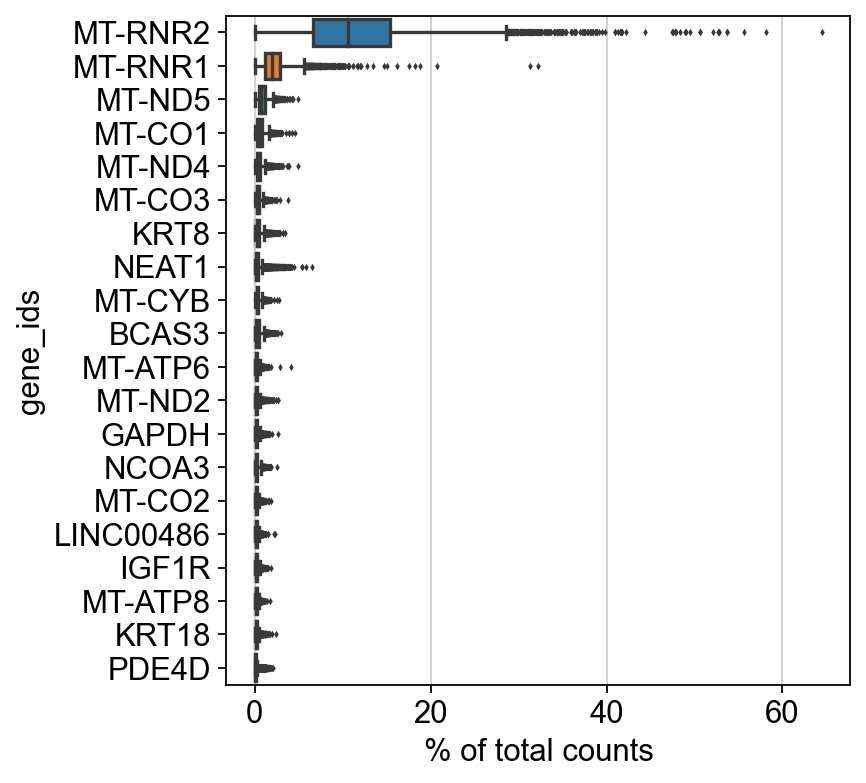

In [13]:
sc.pl.highest_expr_genes(adata, n_top=20, )


In [14]:
# filter out cells with less than 200 genes and genes expressed in less than 3 cells
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)


filtered out 10 cells that have less than 200 genes expressed
filtered out 3101 genes that are detected in less than 3 cells


In [15]:
adata.var_names[np.where(adata.var_names.str.startswith('MT-'))]

Index(['MT-ND6', 'MT-CO2', 'MT-CYB', 'MT-ND2', 'MT-ND5', 'MT-CO1', 'MT-ND3',
       'MT-ND4', 'MT-ND1', 'MT-ATP6', 'MT-CO3', 'MT-TL1', 'MT-TF', 'MT-TV',
       'MT-RNR2', 'MT-TI', 'MT-TM', 'MT-TY', 'MT-TD', 'MT-TG', 'MT-TR',
       'MT-TH', 'MT-TS2', 'MT-TL2', 'MT-TT', 'MT-TP', 'MT-RNR1', 'MT-ND4L',
       'MT-ATP8'],
      dtype='object', name='gene_ids')

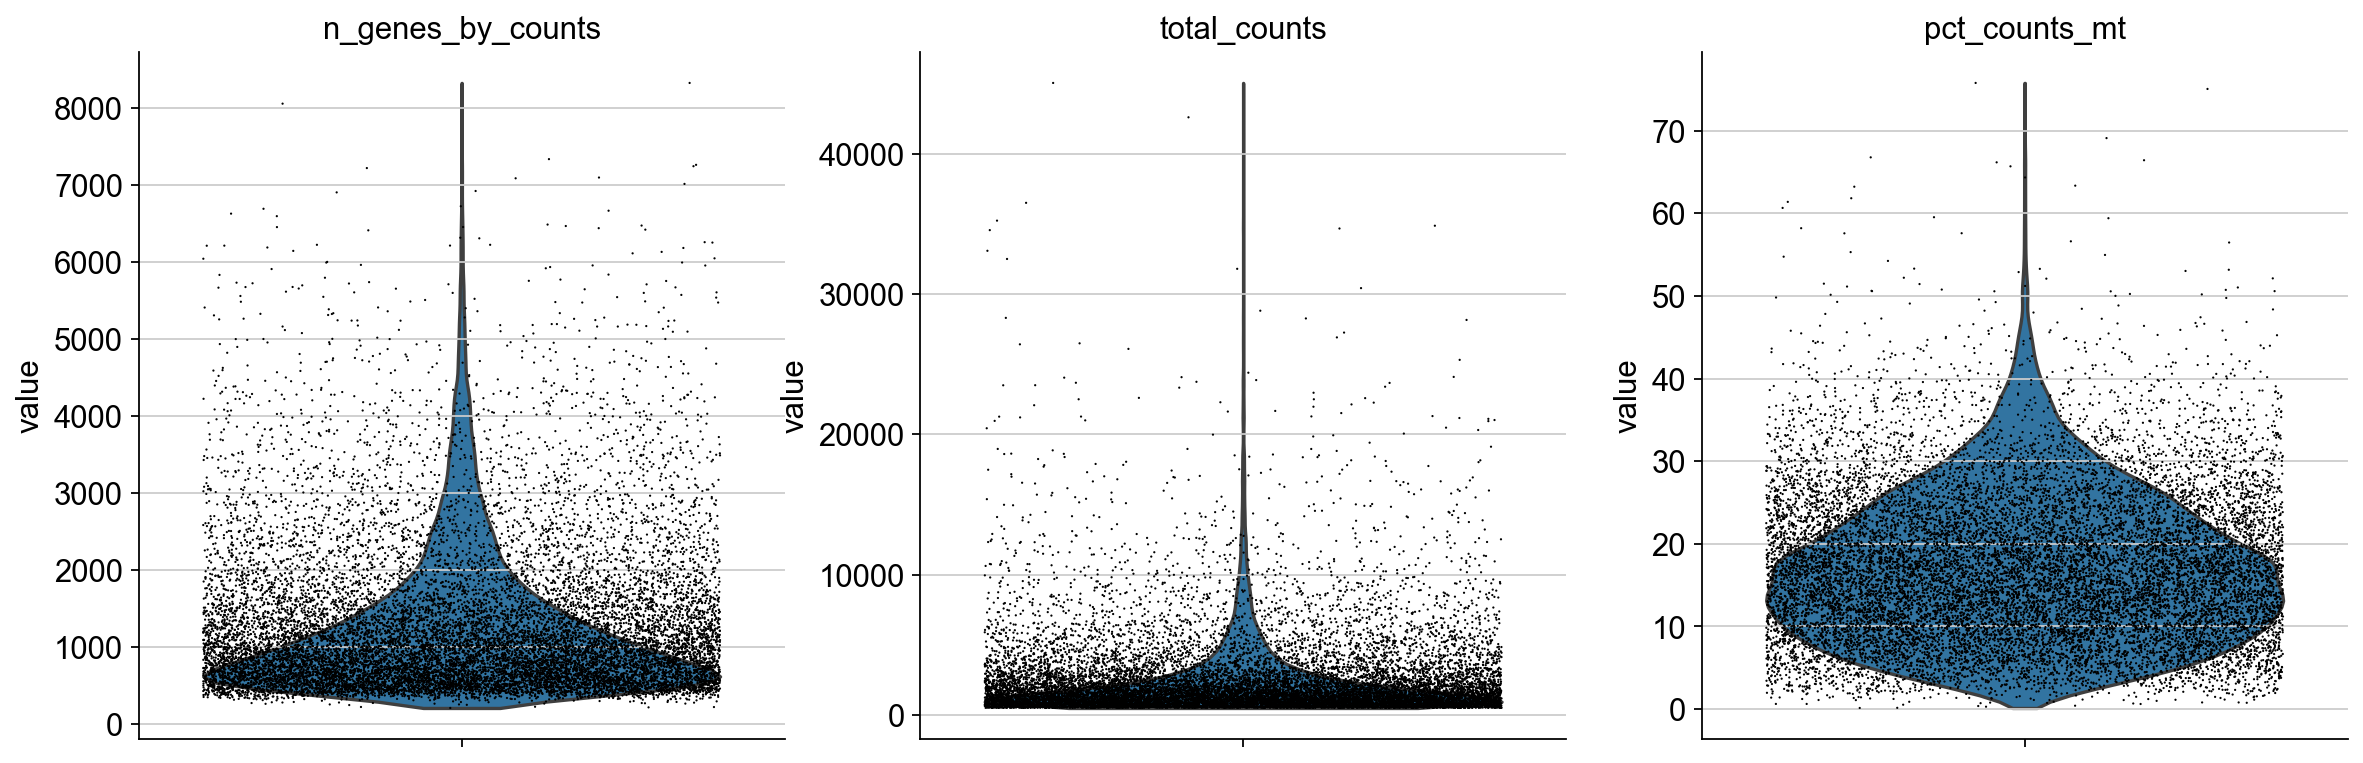

In [16]:
# remove genes with high mitochondrial content
#adata.var_names_make_unique()
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

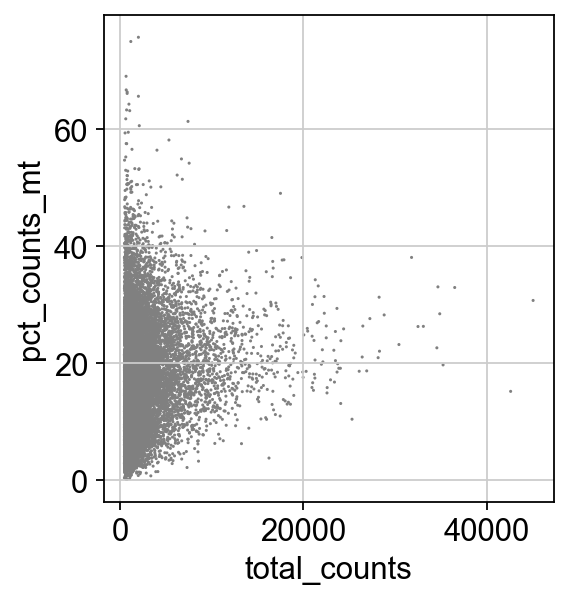

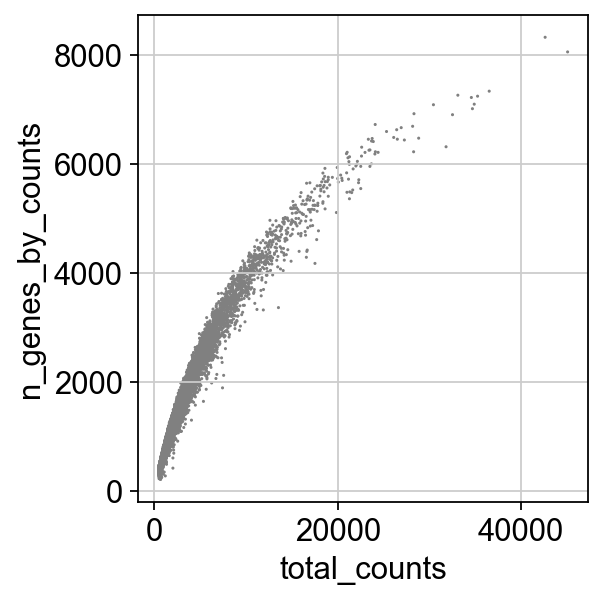

In [17]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [18]:
# slice the data based on the plots from above
# remove cells with more than 600 genes
# remove cells with more than 5% MTgenes
# we aren't removing anything
adata = adata[adata.obs.n_genes_by_counts < 8000, :]


In [19]:
adata

View of AnnData object with n_obs × n_vars = 15756 × 27416
    obs: 'cell', 'Size_Factor', 'n.umi', 'hash_umis_W', 'pval_W', 'qval_W', 'top_to_second_best_ratio_W', 'top_oligo_W', 'hash_umis_P', 'pval_P', 'qval_P', 'top_to_second_best_ratio_P', 'top_oligo_P', 'rt_well', 'lig_well', 'pcr_well', 'pcr_plate', 'culture_plate', 'rt_plate', 'lig_plate', 'Combo', 'well_oligo', 'plate_oligo', 'replicate', 'drug_dose', 'catalog_number', 'vehicle', 'dose_pattern', 'dose_character', 'dose', 'treatment', 'pathway_level_1', 'pathway_level_2', 'product_name', 'target', 'pathway', 'product_dose', 'viability', 'num_genes_expressed', 'g1s_score', 'g2m_score', 'proliferation_index', 'UMAP_1', 'UMAP_2', 'Cluster', 'louvain_component', 'batch', 'perturbation', 'cell_line', 'dose_value', 'dose_unit', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'CellType', 'scpred_CellType', 'sample_id', 'stim', 'n_genes'
    var: 'id', 'gene_short_name', 'num_cells_expressed-0', 'num_cells_expr

# Make pseudobulks

In [20]:
adata.obs["sample_id"].unique()

['samp1']
Categories (1, object): ['samp1']

In [21]:
from importlib import reload  # Python 3.4+
reload(sc_preprocess)


<module 'buddi.preprocessing.sc_preprocess' from '/Users/davidnat/Documents/projects/greenelab/buddi/buddi/preprocessing/sc_preprocess.py'>

In [22]:
tab = adata.obs.groupby(['perturbation', 'dose_value']).size()

tab.unstack()

dose_value,0.0,10000.0
perturbation,,
"Fedratinib (SAR302503, TG101348)",0,314
Tanespimycin (17-AAG),0,375
Trametinib (GSK1120212),0,548
Triamcinolone Acetonide,0,946
Trichostatin A (TSA),0,578
control,12995,0


In [24]:

# metadata
stim_order = adata.obs["perturbation"].unique()


# now generate all the proportions
total_meta_df = pd.DataFrame(columns = ["sample_id", "cell_type", "stim"])

# no cell noise 
len_vector = adata.obs["scpred_CellType"].unique().shape[0]
cell_noise = [np.random.lognormal(0, 0, len(adata.var.gene_ids)) for i in range(len_vector)]

# cell type order
cell_order = adata.obs.scpred_CellType.unique()

# simulate different number of cells
num_cells = 1000
idx = 0

# how many samples
num_samp = 10

# name of the "subject"
curr_samp = "samp1"

# make empty objects
prop_df_all = None
pseudobulks_df_all = None

for curr_stim in stim_order:


  subset_idx = np.where(adata.obs["perturbation"] == curr_stim)
  temp_adata = adata[subset_idx]

  # get the single cell type proportions
  print("get_single_celltype_prop_matrix")
  ct_prop_df = sc_preprocess.get_only1_celltype_prop_matrix(num_samp=num_samp,
                                                              cell_order=cell_order)
  # add a little noise
  noise_range = np.linspace(0.01,0.1,100)
  ct_prop_df = ct_prop_df + np.matrix([np.random.choice(noise_range, num_samp*3), np.random.choice(noise_range, num_samp*3), np.random.choice(noise_range, num_samp*3)]).T
  ct_prop_df = ct_prop_df.div(ct_prop_df.sum(axis=1), axis=0)


  # now get the cell-type specific pseudobulks
  print("use_prop_make_sum")
  prop_df, pseudobulks_df, _ = sc_preprocess.use_prop_make_sum(temp_adata,  
                                                                      num_cells=num_cells, 
                                                                      props_vec=ct_prop_df, 
                                                                      cell_noise=cell_noise,
                                                                      sample_noise=None,
                                                                      useSampleNoise=False)

  # make the proportions instead of cell counts
  prop_df = prop_df.div(prop_df.sum(axis=1), axis=0)

  # make metadata
  curr_meta_df = pd.DataFrame([curr_samp]*(num_samp*len(cell_order)), columns=["sample_id"])
  curr_cell_type = np.repeat(cell_order, num_samp)
  curr_meta_df["cell_type"] = curr_cell_type
  curr_meta_df["perturbation"] = [curr_stim]*(num_samp*len(cell_order)) 

  total_meta_df = pd.concat([total_meta_df, curr_meta_df])


  # put proportions and pseudobulks together
  print("concat")      
  if prop_df is None: 
    prop_df_all = prop_df
    pseudobulks_df_all = pseudobulks_df
  else:
    prop_df_all = pd.concat([prop_df_all, prop_df])
    pseudobulks_df_all = pd.concat([pseudobulks_df_all, pseudobulks_df])

         

total_meta_df["stim"] = [get_stim_id(str(x)) for x in total_meta_df['perturbation'].tolist()]




get_single_celltype_prop_matrix
use_prop_make_sum
0
concat
get_single_celltype_prop_matrix
use_prop_make_sum
0
concat
get_single_celltype_prop_matrix
use_prop_make_sum
0
concat
get_single_celltype_prop_matrix
use_prop_make_sum
0
concat
get_single_celltype_prop_matrix
use_prop_make_sum
0
concat
get_single_celltype_prop_matrix
use_prop_make_sum
0
concat


In [25]:
prop_df_all

,A549,K562,MCF7
0,0.876552,0.048210,0.075237
0,0.930141,0.029042,0.040816
0,0.856734,0.075215,0.068052
0,0.899840,0.031250,0.068910
0,0.900800,0.024000,0.075200
...,...,...,...
0,0.044591,0.072368,0.883041
0,0.017502,0.072395,0.910103
0,0.029316,0.035016,0.935668
0,0.016170,0.022979,0.960851


In [26]:
pseudobulks_df_all

gene_ids,TSPAN6,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,STPG1,...,AC087269.2,AL033527.5,AL662907.3,AP003175.1,AL109936.8,AC116562.4,AL139424.3,AL358472.5,AL645728.2,AL034417.4
0,24.0,106.0,33.0,52.0,0.0,187.0,102.0,612.0,20.0,29.0,...,5.0,3.0,0.0,1.0,1.0,2.0,54.0,6.0,0.0,1.0
0,25.0,109.0,38.0,49.0,0.0,219.0,97.0,570.0,14.0,14.0,...,3.0,0.0,0.0,0.0,0.0,3.0,54.0,3.0,0.0,1.0
0,30.0,100.0,37.0,49.0,0.0,184.0,106.0,524.0,23.0,16.0,...,1.0,5.0,2.0,1.0,1.0,0.0,46.0,2.0,0.0,2.0
0,32.0,93.0,37.0,42.0,0.0,165.0,90.0,547.0,18.0,23.0,...,2.0,2.0,0.0,0.0,0.0,1.0,45.0,0.0,1.0,2.0
0,28.0,99.0,35.0,43.0,0.0,213.0,101.0,524.0,26.0,23.0,...,0.0,4.0,1.0,1.0,0.0,2.0,48.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,109.0,466.0,239.0,128.0,6.0,12.0,274.0,287.0,90.0,28.0,...,0.0,6.0,0.0,0.0,3.0,0.0,14.0,4.0,0.0,0.0
0,126.0,504.0,229.0,115.0,19.0,7.0,269.0,229.0,85.0,25.0,...,0.0,8.0,0.0,2.0,3.0,0.0,7.0,6.0,0.0,0.0
0,109.0,454.0,206.0,131.0,6.0,8.0,278.0,294.0,81.0,34.0,...,0.0,5.0,0.0,0.0,5.0,0.0,13.0,10.0,0.0,0.0
0,127.0,424.0,203.0,129.0,20.0,7.0,288.0,285.0,80.0,30.0,...,0.0,7.0,0.0,0.0,10.0,0.0,8.0,7.0,0.0,0.0


In [27]:
tab = total_meta_df.groupby(['perturbation', 'stim']).size()

tab.unstack()

stim,CTRL,STIM
perturbation,,
"Fedratinib (SAR302503, TG101348)",NaN,30.0
Tanespimycin (17-AAG),NaN,30.0
Trametinib (GSK1120212),NaN,30.0
Triamcinolone Acetonide,NaN,30.0
Trichostatin A (TSA),NaN,30.0
control,30.0,NaN


# DESeq

In [28]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

In [29]:
def get_cell_type_DE(adata, meta_DESeq, expr_matr, cell_type_interest, drug_interest):

    # make it conform to DESeq reqr
    expr_matr = np.ceil(expr_matr)
    expr_matr = expr_matr+1


    # get the index of the cell type and drug of interest
    cell_idx = np.where(meta_DESeq.cell_type == cell_type_interest)[0]
    drug_idx = np.where((meta_DESeq.perturbation == drug_interest) | (meta_DESeq.perturbation == "control"))[0]
    cell_idx = np.intersect1d(cell_idx, drug_idx)

    de_cell = expr_matr.iloc[cell_idx,]
    meta_DESeq_cell = meta_DESeq.iloc[cell_idx,]

    # reindex so that anndata obj can be created easily
    new_index = ["samp_" + str(s) for s in range(len(cell_idx))]
    de_cell.index = new_index
    meta_DESeq_cell.index = new_index

    # filter out lowly expressed genes
    genes_to_keep = de_cell.columns[de_cell.mean(axis=0) > 1]
    de_cell = de_cell[genes_to_keep]    
    print(de_cell.shape)        

    # run deseq
    dds_cell = DeseqDataSet(
        counts=de_cell,
        clinical=meta_DESeq_cell,
        design_factors=["stim"],
        refit_cooks=True
    )

    print("running contrast")

    dds_cell.deseq2()
    cell_res = DeseqStats(dds_cell, contrast=["stim", "STIM", "CTRL"])
    cell_res.summary()

    # get the DESeq res matrix
    cell_res_df = cell_res.results_df

    # get the genes of interest
    cell_res_df_sig = cell_res_df.iloc[np.where(cell_res_df["padj"] < 0.01)[0]]
    cell_res_df_sig = cell_res_df_sig.iloc[np.argsort(np.abs(cell_res_df_sig["log2FoldChange"]))]
    top_genes = cell_res_df_sig.index.to_list()

    return (top_genes, cell_res_df) 

In [30]:
stim_order = adata.obs["perturbation"].unique()
stim_order

['control', 'Triamcinolone Acetonide', 'Fedratinib (SAR302503, TG101348)', 'Trametinib (GSK1120212)', 'Trichostatin A (TSA)', 'Tanespimycin (17-AAG)']
Categories (6, object): ['Fedratinib (SAR302503, TG101348)', 'Tanespimycin (17-AAG)', 'Trametinib (GSK1120212)', 'Triamcinolone Acetonide', 'Trichostatin A (TSA)', 'control']

In [58]:
_, cell_res_df_A549 = get_cell_type_DE(adata, total_meta_df, pseudobulks_df_all, "A549", 'Trichostatin A (TSA)')


(20, 25674)
running contrast
Fitting size factors...
... done in 0.03 seconds.

Fitting dispersions...
... done in 29.19 seconds.

Fitting dispersion trend curve...
... done in 12.18 seconds.

Fitting MAP dispersions...
... done in 16.93 seconds.

Fitting LFCs...
... done in 7.13 seconds.

Refitting 0 outliers.

Running Wald tests...
... done in 2.34 seconds.

Log2 fold change & Wald test p-value: stim STIM vs CTRL


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_ids,,,,,,
TSPAN6,53.452877,1.110859,0.113006,9.830043,8.358341e-23,3.159395e-22
DPM1,340.988419,2.437263,0.054144,45.014244,0.000000e+00,0.000000e+00
SCYL3,32.000520,-0.635567,0.131890,-4.818917,1.443393e-06,2.583708e-06
C1orf112,200.820653,2.746455,0.075647,36.306357,1.284272e-288,8.350314e-287
FGR,1.319936,0.313725,0.620870,0.505298,6.133494e-01,NaN
...,...,...,...,...,...,...
AC116562.4,11.323179,2.835170,0.312770,9.064713,1.249321e-19,4.253133e-19
AL139424.3,29.845102,-2.557077,0.180712,-14.150049,1.866276e-45,1.230917e-44
AL358472.5,6.243678,0.892970,0.307522,2.903755,3.687171e-03,5.038912e-03


In [59]:
cell_res_df_sig_A549 = cell_res_df_A549.iloc[np.where(cell_res_df_A549["padj"] < 0.0000001)[0]]
cell_res_df_sig_A549 = cell_res_df_sig_A549.iloc[np.argsort(np.abs(cell_res_df_sig_A549["log2FoldChange"]))[::-1]]

In [60]:
cell_res_df_sig_A549

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_ids,,,,,,
RPL3L,1353.702717,10.719866,0.374127,28.653049,1.468810e-180,4.712872e-179
AC138819.1,738.714242,10.051746,0.401574,25.030843,2.822747e-138,6.384723e-137
AC008050.1,1914.680105,9.956507,0.246515,40.389050,0.000000e+00,0.000000e+00
CEACAM20,451.639058,9.456804,0.418338,22.605662,3.812146e-113,6.457703e-112
LINC01511,346.404521,9.336665,0.457833,20.393155,1.923327e-92,2.600650e-91
...,...,...,...,...,...,...
TAOK1,608.119036,-0.169459,0.027063,-6.261698,3.808088e-10,8.696319e-10
NFAT5,1167.594257,-0.167889,0.028986,-5.792148,6.949171e-09,1.477027e-08
MTDH,648.349588,-0.161290,0.026082,-6.183883,6.254386e-10,1.413857e-09


In [61]:
_, cell_res_df_MCF7 = get_cell_type_DE(adata, total_meta_df, pseudobulks_df_all, "MCF7", 'Trichostatin A (TSA)')
cell_res_df_sig_MCF7 = cell_res_df_MCF7.iloc[np.where(cell_res_df_MCF7["padj"] < 0.0000001)[0]]
cell_res_df_sig_MCF7 = cell_res_df_sig_MCF7.iloc[np.argsort(np.abs(cell_res_df_sig_MCF7["log2FoldChange"]))[::-1]]
cell_res_df_sig_MCF7

(20, 27013)
running contrast
Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 22.76 seconds.

Fitting dispersion trend curve...
... done in 10.62 seconds.

Fitting MAP dispersions...
... done in 36.03 seconds.

Fitting LFCs...
... done in 5.02 seconds.

Refitting 1 outliers.

Fitting dispersions...
... done in 0.07 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting LFCs...
... done in 0.01 seconds.

Running Wald tests...
... done in 3.40 seconds.

Log2 fold change & Wald test p-value: stim STIM vs CTRL


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_ids,,,,,,
TSPAN6,36.270108,-0.311646,0.123966,-2.513966,1.193818e-02,1.781271e-02
DPM1,777.164262,2.031609,0.039183,51.849710,0.000000e+00,0.000000e+00
SCYL3,75.562832,-0.178243,0.092672,-1.923373,5.443319e-02,7.387578e-02
C1orf112,369.632151,2.674853,0.060133,44.482477,0.000000e+00,0.000000e+00
FGR,1.423125,-0.116856,0.589983,-0.198067,8.429925e-01,8.585129e-01
...,...,...,...,...,...,...
AC116562.4,1.994227,0.757247,0.517280,1.463900,1.432212e-01,1.803220e-01
AL139424.3,5.776976,-1.050951,0.318138,-3.303442,9.550556e-04,1.619803e-03
AL358472.5,12.261543,1.645123,0.244074,6.740261,1.581025e-11,4.411245e-11


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_ids,,,,,,
RPL3L,4598.271993,11.695059,0.265357,44.072905,0.000000e+00,0.000000e+00
CEACAM22P,5284.099289,10.969283,0.192888,56.868682,0.000000e+00,0.000000e+00
AC008050.1,5924.290426,10.540576,0.160592,65.635733,0.000000e+00,0.000000e+00
COL26A1,14632.228802,10.394815,0.098926,105.076543,0.000000e+00,0.000000e+00
AC092957.1,5620.159809,10.020147,0.140186,71.477676,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...
RPL18,1385.889981,0.131100,0.021398,6.126746,8.969455e-10,2.307783e-09
USP32,5822.620418,-0.127443,0.022779,-5.594782,2.208993e-08,5.278819e-08
LRBA,1727.642626,-0.117166,0.020535,-5.705695,1.158693e-08,2.810775e-08


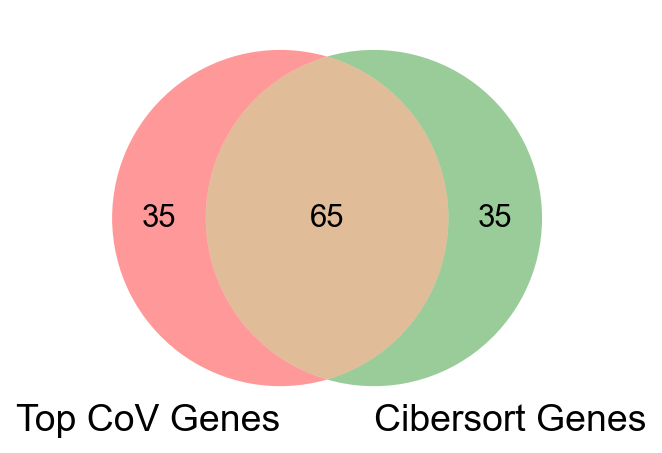

In [62]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

cell_res_df_sig_MCF7 = cell_res_df_sig_MCF7.iloc[np.argsort((cell_res_df_sig_MCF7["log2FoldChange"]))[::-1]]
cell_res_df_sig_A549 = cell_res_df_sig_A549.iloc[np.argsort((cell_res_df_sig_A549["log2FoldChange"]))[::-1]]

max_idx = 100
venn2([set(cell_res_df_sig_A549.index[0:max_idx]), set(cell_res_df_sig_MCF7.index[0:max_idx])], set_labels = ('Top CoV Genes', 'Cibersort Genes'))
plt.show()

In [56]:
cell_res_df_sig_A549

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_ids,,,,,,
CDH16,137.955135,6.823340,0.296982,22.975608,8.174886e-117,1.762638e-114
HSD11B2,94.871635,5.516231,0.240949,22.893788,5.357833e-116,1.116295e-113
CIDEC,100.580263,5.178002,0.200031,25.886005,9.573463e-148,3.170013e-145
SCNN1G,34.599637,5.049148,0.330068,15.297279,7.972091e-53,4.006138e-51
RRAD,22.585118,5.014302,0.402549,12.456376,1.291052e-35,3.746476e-34
...,...,...,...,...,...,...
ANKS4B,16.483088,-4.850795,0.473109,-10.253027,1.146940e-24,2.006387e-23
FBXO43,20.569838,-4.911408,0.430574,-11.406660,3.873165e-30,8.877639e-29
TRIML2,24.361633,-5.292940,0.445616,-11.877809,1.543599e-32,3.931724e-31


In [57]:
cell_res_df_sig_MCF7

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_ids,,,,,,
ZBTB16,83.578392,6.343803,0.322007,19.700835,2.120913e-86,7.255395e-84
KRT6A,48.762212,4.972274,0.366761,13.557250,7.177699e-42,8.787770e-40
CCL5,22.778707,4.494753,0.589443,7.625418,2.432452e-14,6.649082e-13
KRT13,212.786563,4.368176,0.113437,38.507589,0.000000e+00,0.000000e+00
CDH16,7.132797,3.774957,0.554233,6.811131,9.683470e-12,1.850919e-10
...,...,...,...,...,...,...
AC073957.3,6.332866,-3.438217,0.492960,-6.974642,3.066509e-12,6.386136e-11
LINC00639,6.458477,-3.464382,0.490725,-7.059722,1.668358e-12,3.623656e-11
AC008736.1,8.526365,-3.611191,0.446163,-8.093877,5.779496e-16,1.844206e-14


In [42]:
import pickle

print("write")        

de_results_file

write


'/Users/davidnat/Documents/projects/greenelab/buddi_test/buddi_analysis/sc_preprocessing/0_qc_notebooks/../../data/single_cell_data/sciplex//de_pseudobulk_results'

In [83]:

for curr_drug_type in total_meta_df.perturbation.unique():
    all_res_df = {}

    if curr_drug_type == "control":
        continue

    for curr_cell_type in adata.obs.scpred_CellType.unique():
        
        print(curr_cell_type, curr_drug_type)
        top_genes, _ = get_cell_type_DE(adata, total_meta_df, pseudobulks_df_all, curr_cell_type, curr_drug_type)
        all_res_df[curr_cell_type] = top_genes

    drug_str = curr_drug_type.replace(" ", "").replace("(", "").replace(")", "").replace(",", "")
    de_results_file_curr = f"{de_results_file}_{drug_str}.pkl"
    pickle.dump( all_res_df, open( de_results_file_curr, "wb" ) )

    

A549 Triamcinolone Acetonide
(20, 25451)
running contrast
Fitting size factors...
... done in 0.05 seconds.

Fitting dispersions...
... done in 20.57 seconds.

Fitting dispersion trend curve...
... done in 10.96 seconds.

Fitting MAP dispersions...
... done in 18.89 seconds.

Fitting LFCs...
... done in 4.42 seconds.

Refitting 1 outliers.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting LFCs...
... done in 0.01 seconds.

Running Wald tests...
... done in 2.67 seconds.

Log2 fold change & Wald test p-value: stim STIM vs CTRL


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_ids,,,,,,
TSPAN6,29.946083,-0.065960,0.144546,-0.456328,6.481539e-01,6.966425e-01
DPM1,90.630329,-0.169025,0.081822,-2.065767,3.885045e-02,5.902531e-02
SCYL3,35.991684,0.061296,0.156094,0.392688,6.945498e-01,7.377577e-01
C1orf112,28.471584,-2.250492,0.180927,-12.438692,1.611201e-35,4.632016e-34
FGR,1.189766,0.313434,0.644738,0.486142,6.268664e-01,NaN
...,...,...,...,...,...,...
AC116562.4,1.815182,-1.191589,0.570835,-2.087449,3.684758e-02,5.644340e-02
AL139424.3,51.180573,0.286825,0.131166,2.186724,2.876268e-02,4.546470e-02
AL358472.5,2.517873,-1.844497,0.541659,-3.405271,6.609836e-04,1.473860e-03


K562 Triamcinolone Acetonide
(20, 25416)
running contrast
Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 18.59 seconds.

Fitting dispersion trend curve...
... done in 19.19 seconds.

Fitting MAP dispersions...
... done in 24.15 seconds.

Fitting LFCs...
... done in 4.67 seconds.

Refitting 0 outliers.

Running Wald tests...
... done in 3.57 seconds.

Log2 fold change & Wald test p-value: stim STIM vs CTRL


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_ids,,,,,,
TSPAN6,7.435430,0.391354,0.271963,1.438995,0.150152,0.217693
DPM1,91.837476,-0.387972,0.081724,-4.747348,0.000002,0.000013
SCYL3,31.797327,0.488347,0.131843,3.703995,0.000212,0.000773
C1orf112,79.349266,0.241467,0.087659,2.754615,0.005876,0.013830
FGR,2.597695,2.027277,0.544617,3.722390,0.000197,0.000725
...,...,...,...,...,...,...
AC116562.4,1.935073,-1.451850,0.571997,-2.538211,0.011142,0.024007
AL139424.3,3.695344,-1.156284,0.409130,-2.826201,0.004710,0.011437
AL358472.5,2.178044,-1.653318,0.559894,-2.952912,0.003148,0.008063


MCF7 Triamcinolone Acetonide
(20, 26915)
running contrast
Fitting size factors...
... done in 0.05 seconds.

Fitting dispersions...
... done in 21.64 seconds.

Fitting dispersion trend curve...
... done in 10.65 seconds.

Fitting MAP dispersions...
... done in 42.33 seconds.

Fitting LFCs...
... done in 4.31 seconds.

Refitting 0 outliers.

Running Wald tests...
... done in 3.37 seconds.

Log2 fold change & Wald test p-value: stim STIM vs CTRL


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_ids,,,,,,
TSPAN6,43.800181,0.112238,0.109583,1.024233,0.305725,0.395539
DPM1,333.671397,0.118343,0.047420,2.495608,0.012574,0.030529
SCYL3,85.991185,0.062206,0.085423,0.728220,0.466479,0.555249
C1orf112,103.183072,-0.047923,0.072051,-0.665121,0.505973,0.592109
FGR,2.271921,0.951820,0.491662,1.935922,0.052877,0.099865
...,...,...,...,...,...,...
AC116562.4,1.313205,-0.533263,0.623387,-0.855428,0.392314,NaN
AL139424.3,8.324792,0.055932,0.255392,0.219004,0.826647,0.869757
AL358472.5,3.663811,-2.537566,0.527406,-4.811413,0.000001,0.000011


A549 Fedratinib (SAR302503, TG101348)
(20, 25210)
running contrast
Fitting size factors...
... done in 0.03 seconds.

Fitting dispersions...
... done in 23.88 seconds.

Fitting dispersion trend curve...
... done in 13.23 seconds.

Fitting MAP dispersions...
... done in 16.59 seconds.

Fitting LFCs...
... done in 4.22 seconds.

Refitting 0 outliers.

Running Wald tests...
... done in 2.36 seconds.

Log2 fold change & Wald test p-value: stim STIM vs CTRL


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_ids,,,,,,
TSPAN6,39.255359,0.493955,0.127545,3.872803,1.075907e-04,2.179026e-04
DPM1,143.287328,0.847150,0.069799,12.137033,6.721920e-34,7.073957e-33
SCYL3,50.301474,0.749093,0.119449,6.271231,3.582050e-10,1.099707e-09
C1orf112,27.430556,-3.434598,0.238490,-14.401406,5.070143e-47,8.065276e-46
FGR,1.107264,-0.070383,0.674345,-0.104373,9.168737e-01,NaN
...,...,...,...,...,...,...
AC116562.4,7.291736,2.148386,0.335782,6.398150,1.572706e-10,4.953221e-10
AL139424.3,40.442268,-0.631065,0.118320,-5.333547,9.631268e-08,2.490543e-07
AL358472.5,19.621849,3.050632,0.258411,11.805341,3.663036e-32,3.583953e-31


K562 Fedratinib (SAR302503, TG101348)
(20, 25080)
running contrast
Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 19.65 seconds.

Fitting dispersion trend curve...
... done in 11.23 seconds.

Fitting MAP dispersions...
... done in 16.35 seconds.

Fitting LFCs...
... done in 3.97 seconds.

Refitting 0 outliers.

Running Wald tests...
... done in 3.27 seconds.

Log2 fold change & Wald test p-value: stim STIM vs CTRL


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_ids,,,,,,
TSPAN6,5.160517,-0.007172,0.313308,-0.022893,9.817358e-01,9.850115e-01
DPM1,97.276021,0.394588,0.077952,5.061901,4.150964e-07,9.869693e-07
SCYL3,35.129448,1.194566,0.129662,9.212915,3.173850e-20,1.517911e-19
C1orf112,50.217594,-0.499859,0.107510,-4.649417,3.328739e-06,7.392291e-06
CFH,110.996391,-1.733724,0.108866,-15.925344,4.226828e-57,9.836191e-56
...,...,...,...,...,...,...
AC116562.4,2.029052,-0.348629,0.499019,-0.698629,4.847841e-01,5.355416e-01
AL139424.3,4.680757,0.354446,0.361489,0.980518,3.268304e-01,3.818743e-01
AL358472.5,3.143569,0.445960,0.409275,1.089636,2.758735e-01,3.301938e-01


MCF7 Fedratinib (SAR302503, TG101348)
(20, 26822)
running contrast
Fitting size factors...
... done in 0.14 seconds.

Fitting dispersions...
... done in 21.01 seconds.

Fitting dispersion trend curve...
... done in 9.28 seconds.

Fitting MAP dispersions...
... done in 52.88 seconds.

Fitting LFCs...
... done in 11.20 seconds.

Refitting 0 outliers.

Running Wald tests...
... done in 4.86 seconds.

Log2 fold change & Wald test p-value: stim STIM vs CTRL


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_ids,,,,,,
TSPAN6,39.199317,-0.048711,0.117222,-0.415548,6.777407e-01,7.011595e-01
DPM1,399.035096,0.705833,0.040189,17.562882,4.740572e-69,7.281985e-68
SCYL3,84.973922,0.180585,0.080257,2.250101,2.444252e-02,3.631977e-02
C1orf112,69.491530,-1.330295,0.099607,-13.355470,1.100606e-40,9.686807e-40
FGR,1.309505,-0.354217,0.621964,-0.569513,5.690078e-01,6.035010e-01
...,...,...,...,...,...,...
AC116562.4,1.542044,0.130818,0.569213,0.229823,8.182295e-01,8.335988e-01
AL139424.3,17.307262,1.801083,0.199954,9.007503,2.108018e-19,1.001087e-18
AL358472.5,4.170165,-1.288802,0.405076,-3.181631,1.464481e-03,2.551914e-03


A549 Trametinib (GSK1120212)
(20, 25348)
running contrast
Fitting size factors...
... done in 0.05 seconds.

Fitting dispersions...
... done in 41.65 seconds.

Fitting dispersion trend curve...
... done in 18.46 seconds.

Fitting MAP dispersions...
... done in 34.28 seconds.

Fitting LFCs...
... done in 11.11 seconds.

Refitting 0 outliers.

Running Wald tests...
... done in 4.96 seconds.

Log2 fold change & Wald test p-value: stim STIM vs CTRL


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_ids,,,,,,
TSPAN6,15.355330,-3.059305,0.296021,-10.334772,4.905755e-25,8.581854e-24
DPM1,82.104746,-0.131835,0.082874,-1.590787,1.116576e-01,2.032675e-01
SCYL3,28.113109,-0.353505,0.148008,-2.388416,1.692118e-02,3.742087e-02
C1orf112,24.434471,-2.657260,0.213578,-12.441640,1.552818e-35,4.800101e-34
FGR,1.062203,0.302095,0.668087,0.452179,6.511401e-01,7.900468e-01
...,...,...,...,...,...,...
AC116562.4,2.071713,-0.262246,0.492300,-0.532695,5.942445e-01,7.773926e-01
AL139424.3,35.547382,-0.469191,0.123027,-3.813716,1.368927e-04,4.105970e-04
AL358472.5,2.346078,-1.593567,0.539769,-2.952312,3.154043e-03,7.901630e-03


K562 Trametinib (GSK1120212)
(20, 25229)
running contrast
Fitting size factors...
... done in 0.09 seconds.

Fitting dispersions...
... done in 36.76 seconds.

Fitting dispersion trend curve...
... done in 29.14 seconds.

Fitting MAP dispersions...
... done in 35.88 seconds.

Fitting LFCs...
... done in 8.42 seconds.

Refitting 0 outliers.

Running Wald tests...
... done in 4.81 seconds.

Log2 fold change & Wald test p-value: stim STIM vs CTRL


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_ids,,,,,,
TSPAN6,4.617521,-0.959510,0.366302,-2.619447,8.807247e-03,1.498390e-02
DPM1,119.553173,0.496820,0.070272,7.069933,1.550084e-12,9.494199e-12
SCYL3,15.881355,-1.944535,0.223013,-8.719374,2.797429e-18,2.879034e-17
C1orf112,68.835733,-0.019834,0.088632,-0.223776,8.229312e-01,8.546414e-01
CFH,150.972097,-0.994829,0.083769,-11.875818,1.580797e-32,3.996785e-31
...,...,...,...,...,...,...
AC116562.4,2.044292,-0.937971,0.522913,-1.793741,7.285451e-02,1.013808e-01
AL139424.3,3.627300,-1.020964,0.406180,-2.513577,1.195136e-02,1.981402e-02
AL358472.5,2.125090,-1.518709,0.557636,-2.723477,6.459873e-03,1.127304e-02


MCF7 Trametinib (GSK1120212)
(20, 26850)
running contrast
Fitting size factors...
... done in 0.04 seconds.

Fitting dispersions...
... done in 45.72 seconds.

Fitting dispersion trend curve...
... done in 17.77 seconds.

Fitting MAP dispersions...
... done in 78.17 seconds.

Fitting LFCs...
... done in 14.23 seconds.

Refitting 0 outliers.

Running Wald tests...
... done in 5.23 seconds.

Log2 fold change & Wald test p-value: stim STIM vs CTRL


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_ids,,,,,,
TSPAN6,36.059159,-0.573813,0.123397,-4.650152,3.316897e-06,1.198566e-05
DPM1,320.025250,-0.072580,0.048018,-1.511510,1.306586e-01,1.780215e-01
SCYL3,93.501514,0.227065,0.078465,2.893834,3.805690e-03,7.685567e-03
C1orf112,69.811396,-1.742673,0.102830,-16.947076,2.022667e-64,1.980507e-62
FGR,1.332903,-0.564265,0.621309,-0.908187,3.637794e-01,NaN
...,...,...,...,...,...,...
AC116562.4,4.934144,2.380680,0.416654,5.713805,1.104776e-08,5.560060e-08
AL139424.3,5.045301,-2.280361,0.414664,-5.499304,3.812939e-08,1.793112e-07
AL358472.5,3.743319,-2.568666,0.525747,-4.885748,1.030370e-06,4.011199e-06


A549 Trichostatin A (TSA)
(20, 25674)
running contrast
Fitting size factors...
... done in 0.05 seconds.

Fitting dispersions...
... done in 46.29 seconds.

Fitting dispersion trend curve...
... done in 26.38 seconds.

Fitting MAP dispersions...
... done in 40.30 seconds.

Fitting LFCs...
... done in 8.25 seconds.

Refitting 0 outliers.

Running Wald tests...
... done in 5.18 seconds.

Log2 fold change & Wald test p-value: stim STIM vs CTRL


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_ids,,,,,,
TSPAN6,53.452877,1.110859,0.113006,9.830043,8.358341e-23,3.159395e-22
DPM1,340.988419,2.437263,0.054144,45.014244,0.000000e+00,0.000000e+00
SCYL3,32.000520,-0.635567,0.131890,-4.818917,1.443393e-06,2.583708e-06
C1orf112,200.820653,2.746455,0.075647,36.306357,1.284272e-288,8.350314e-287
FGR,1.319936,0.313725,0.620870,0.505298,6.133494e-01,NaN
...,...,...,...,...,...,...
AC116562.4,11.323179,2.835170,0.312770,9.064713,1.249321e-19,4.253133e-19
AL139424.3,29.845102,-2.557077,0.180712,-14.150049,1.866276e-45,1.230917e-44
AL358472.5,6.243678,0.892970,0.307522,2.903755,3.687171e-03,5.038912e-03


K562 Trichostatin A (TSA)
(20, 25529)
running contrast
Fitting size factors...
... done in 0.05 seconds.

Fitting dispersions...
... done in 41.24 seconds.

Fitting dispersion trend curve...
... done in 17.69 seconds.

Fitting MAP dispersions...
... done in 29.46 seconds.

Fitting LFCs...
... done in 7.47 seconds.

Refitting 0 outliers.

Running Wald tests...
... done in 4.90 seconds.

Log2 fold change & Wald test p-value: stim STIM vs CTRL


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_ids,,,,,,
TSPAN6,5.956433,0.110914,0.316343,0.350613,7.258785e-01,7.645539e-01
DPM1,189.965561,1.628413,0.068474,23.781599,5.178114e-125,5.198068e-123
SCYL3,55.032941,1.872546,0.114920,16.294322,1.082978e-59,2.473542e-58
C1orf112,107.243512,1.206515,0.088122,13.691463,1.141866e-42,1.525874e-41
FGR,8.756970,4.183614,0.481606,8.686802,3.727840e-18,1.718146e-17
...,...,...,...,...,...,...
AC116562.4,10.065904,2.787611,0.310176,8.987199,2.536112e-19,1.250974e-18
AL139424.3,3.032544,-1.608496,0.479563,-3.354084,7.962806e-04,1.429900e-03
AL358472.5,3.092303,0.136976,0.415069,0.330008,7.413939e-01,7.789027e-01


MCF7 Trichostatin A (TSA)
(20, 27013)
running contrast
Fitting size factors...
... done in 0.12 seconds.

Fitting dispersions...
... done in 42.42 seconds.

Fitting dispersion trend curve...
... done in 19.04 seconds.

Fitting MAP dispersions...
... done in 61.06 seconds.

Fitting LFCs...
... done in 8.88 seconds.

Refitting 1 outliers.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting LFCs...
... done in 0.02 seconds.

Running Wald tests...
... done in 4.68 seconds.

Log2 fold change & Wald test p-value: stim STIM vs CTRL


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_ids,,,,,,
TSPAN6,36.270108,-0.311646,0.123966,-2.513966,1.193818e-02,1.781271e-02
DPM1,777.164262,2.031609,0.039183,51.849710,0.000000e+00,0.000000e+00
SCYL3,75.562832,-0.178243,0.092672,-1.923373,5.443319e-02,7.387578e-02
C1orf112,369.632151,2.674853,0.060133,44.482477,0.000000e+00,0.000000e+00
FGR,1.423125,-0.116856,0.589983,-0.198067,8.429925e-01,8.585129e-01
...,...,...,...,...,...,...
AC116562.4,1.994227,0.757247,0.517280,1.463900,1.432212e-01,1.803220e-01
AL139424.3,5.776976,-1.050951,0.318138,-3.303442,9.550556e-04,1.619803e-03
AL358472.5,12.261543,1.645123,0.244074,6.740261,1.581025e-11,4.411245e-11


A549 Tanespimycin (17-AAG)
(20, 25334)
running contrast
Fitting size factors...
... done in 0.20 seconds.

Fitting dispersions...
... done in 43.04 seconds.

Fitting dispersion trend curve...
... done in 22.60 seconds.

Fitting MAP dispersions...
... done in 32.31 seconds.

Fitting LFCs...
... done in 9.58 seconds.

Refitting 0 outliers.

Running Wald tests...
... done in 4.38 seconds.

Log2 fold change & Wald test p-value: stim STIM vs CTRL


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_ids,,,,,,
TSPAN6,20.208228,-1.913230,0.198742,-9.626703,6.167672e-22,4.974823e-21
DPM1,104.845077,0.125958,0.079370,1.586970,1.125194e-01,1.470187e-01
SCYL3,42.688251,0.403635,0.121318,3.327085,8.775968e-04,1.667911e-03
C1orf112,42.516487,-0.449557,0.125450,-3.583541,3.389672e-04,6.770852e-04
FGR,1.367891,0.553520,0.612945,0.903050,3.664993e-01,NaN
...,...,...,...,...,...,...
AC116562.4,1.859650,-1.271927,0.570612,-2.229057,2.581008e-02,3.919097e-02
AL139424.3,69.931666,0.930486,0.096584,9.634001,5.744823e-22,4.635630e-21
AL358472.5,2.655249,-1.788536,0.523683,-3.415306,6.371037e-04,1.231034e-03


K562 Tanespimycin (17-AAG)
(20, 25221)
running contrast
Fitting size factors...
... done in 0.05 seconds.

Fitting dispersions...
... done in 34.91 seconds.

Fitting dispersion trend curve...
... done in 24.89 seconds.

Fitting MAP dispersions...
... done in 30.13 seconds.

Fitting LFCs...
... done in 8.75 seconds.

Refitting 0 outliers.

Running Wald tests...
... done in 5.16 seconds.

Log2 fold change & Wald test p-value: stim STIM vs CTRL


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_ids,,,,,,
TSPAN6,6.621637,0.241954,0.284118,0.851595,3.944388e-01,4.529950e-01
DPM1,96.888873,-0.049455,0.077845,-0.635305,5.252295e-01,5.815627e-01
SCYL3,44.784616,1.366070,0.119454,11.435945,2.765083e-30,3.459317e-29
C1orf112,39.152157,-2.865261,0.175049,-16.368362,3.217552e-60,1.338421e-58
FGR,1.798708,1.454283,0.599741,2.424853,1.531457e-02,2.471908e-02
...,...,...,...,...,...,...
AC116562.4,1.883228,-1.279645,0.568322,-2.251618,2.434644e-02,3.790068e-02
AL139424.3,5.424748,0.311078,0.319188,0.974592,3.297626e-01,3.863684e-01
AL358472.5,2.290841,-1.106080,0.510740,-2.165644,3.033841e-02,4.646660e-02


MCF7 Tanespimycin (17-AAG)
(20, 26834)
running contrast
Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 41.79 seconds.

Fitting dispersion trend curve...
... done in 14.33 seconds.

Fitting MAP dispersions...
... done in 72.49 seconds.

Fitting LFCs...
... done in 9.57 seconds.

Refitting 0 outliers.

Running Wald tests...
... done in 4.55 seconds.

Log2 fold change & Wald test p-value: stim STIM vs CTRL


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_ids,,,,,,
TSPAN6,80.786779,1.241463,0.092992,13.350149,1.182125e-40,1.138527e-39
DPM1,402.831764,0.274074,0.043405,6.314366,2.712711e-10,9.001371e-10
SCYL3,153.206637,1.137067,0.070920,16.033163,7.496756e-58,1.025162e-56
C1orf112,120.501734,0.024140,0.067583,0.357188,7.209509e-01,7.468409e-01
FGR,7.265421,2.850031,0.409493,6.959905,3.405034e-12,1.262551e-11
...,...,...,...,...,...,...
AC116562.4,1.373555,-0.853196,0.622028,-1.371637,1.701766e-01,1.987022e-01
AL139424.3,11.976132,0.660948,0.217631,3.037010,2.389377e-03,4.051841e-03
AL358472.5,6.737736,-0.153051,0.310842,-0.492375,6.224541e-01,6.538042e-01
